https://github.com/Nixtla/statsforecast/blob/main/experiments/arima/src/statsforecast.py

https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.statsforecast.StatsForecastAutoARIMA.html#r81115f9ccdb2-2

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from load import train_test_split
from load import load_data
from multiprocessing import cpu_count


In [5]:
rcParams['figure.figsize'] = 15, 5

In [11]:
df = load_data()
df["load_mwmed"].interpolate(method = "linear", inplace = True)  # preenche valores vazios
df.shape

(196451, 1)

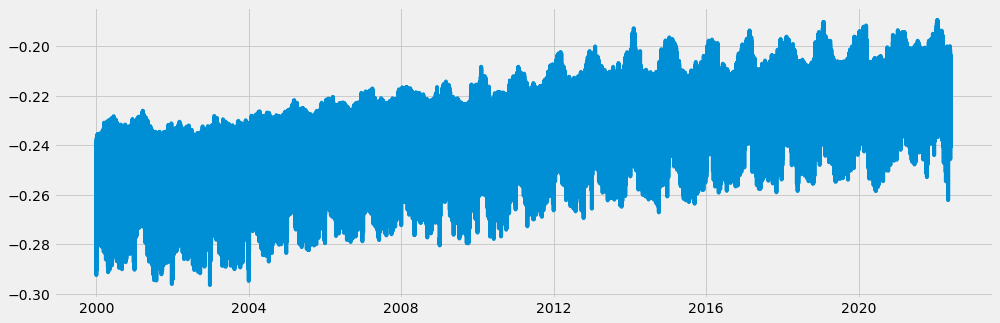

In [17]:
plt.figure()

df.load_mwmed = np.log(df.load_mwmed) # série logaritmizada
plt.plot(df)

plt.show()

In [65]:
train2

date
2000-01-01 00:00:00   -0.261883
2000-01-01 01:00:00   -0.264296
2000-01-01 02:00:00   -0.270694
2000-01-01 03:00:00   -0.275754
2000-01-01 04:00:00   -0.278412
                         ...   
2022-05-23 20:00:00   -0.205900
2022-05-23 21:00:00   -0.208666
2022-05-23 22:00:00   -0.213183
2022-05-23 23:00:00   -0.220005
2022-05-24 00:00:00   -0.225608
Length: 196283, dtype: float64

In [44]:
# split treino-teste
n_test = 168
train, test = train_test_split(df, n_test)

In [57]:
from sktime.datasets import load_airline
y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [68]:
train2 = pd.Series(train.load_mwmed)
train2 = train2.asfreq('H')

In [70]:
train2

date
2000-01-01 00:00:00   -0.261883
2000-01-01 01:00:00   -0.264296
2000-01-01 02:00:00   -0.270694
2000-01-01 03:00:00   -0.275754
2000-01-01 04:00:00   -0.278412
                         ...   
2022-05-23 20:00:00   -0.205900
2022-05-23 21:00:00   -0.208666
2022-05-23 22:00:00   -0.213183
2022-05-23 23:00:00   -0.220005
2022-05-24 00:00:00   -0.225608
Freq: H, Length: 196297, dtype: float64

In [71]:
# PROBLEMA COM A SÉRIE DE CARGA ELÉTRICA
forecaster = StatsForecastAutoARIMA(
                            start_p=1, 
                            start_q=1,
                            test='kpss', 
                            max_p=4, max_q=5, # maximum p and q
                            max_P=2, max_Q=2,
                            #d=None,
                            max_d = 2,
                            #D=None# let model determine 'd'
                            max_D = 2,
                            seasonal=True, 
                            sp=12, # frequency of series (if m=1, seasonal is set to FALSE automatically)
                            trace=True, #logs 
                            stepwise=True,
                            information_criterion='bic')
                        
forecaster.fit(y)


ARIMA(1,1,1)(1,1,1)[12]                   :1038.7145159190222

ARIMA(0,1,0)(0,1,0)[12]                   :1034.3756426176394

ARIMA(1,1,0)(1,1,0)[12]                   :1029.0040570922379

ARIMA(0,1,1)(0,1,1)[12]                   :1029.6099686324906

ARIMA(1,1,0)(0,1,0)[12]                   :1026.1372433388642

ARIMA(1,1,0)(0,1,1)[12]                   :1029.5262649393771

ARIMA(1,1,0)(1,1,1)[12]                   :1033.815851522162

ARIMA(2,1,0)(0,1,0)[12]                   :1031.0030304441223

ARIMA(1,1,1)(0,1,0)[12]                   :1031.0027322787905

ARIMA(0,1,1)(0,1,0)[12]                   :1026.3748283970922

ARIMA(2,1,1)(0,1,0)[12]                   :1032.211346826087

ARIMA(2,1,1)(0,1,0)[12]                   :1032.211346826087
Now re-fitting the best model(s) without approximations...


ARIMA(1,1,0)(0,1,0)[12]                   :1026.1372433388642


StatsForecastAutoARIMA(information_criterion='bic', max_D=2, max_p=4, sp=12,
                       start_p=1, start_q=1, trace=True)

In [72]:
y_pred = forecaster.predict(fh=[1,2,3])
y_pred

1961-01    444.300051
1961-02    418.210020
1961-03    446.237034
Freq: M, dtype: float64